<a href="https://colab.research.google.com/github/Geektaimoor/Phishing-link-Detection-/blob/main/DAV_SEM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pre Data Analysis To check Dataset details**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/web-page-phishing.csv")

# Get basic dataset info
df.info()

# Get summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Display first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# **Polluting Data**



Class Distribution:
phishing
0    63715
1    36362
Name: count, dtype: int64


<ipython-input-2-06e3351322ff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["phishing"], palette="coolwarm")


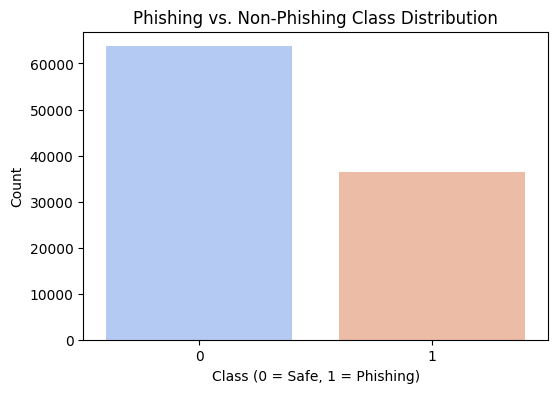

Imbalance Ratio: 1.75 (Non-Phishing to Phishing)


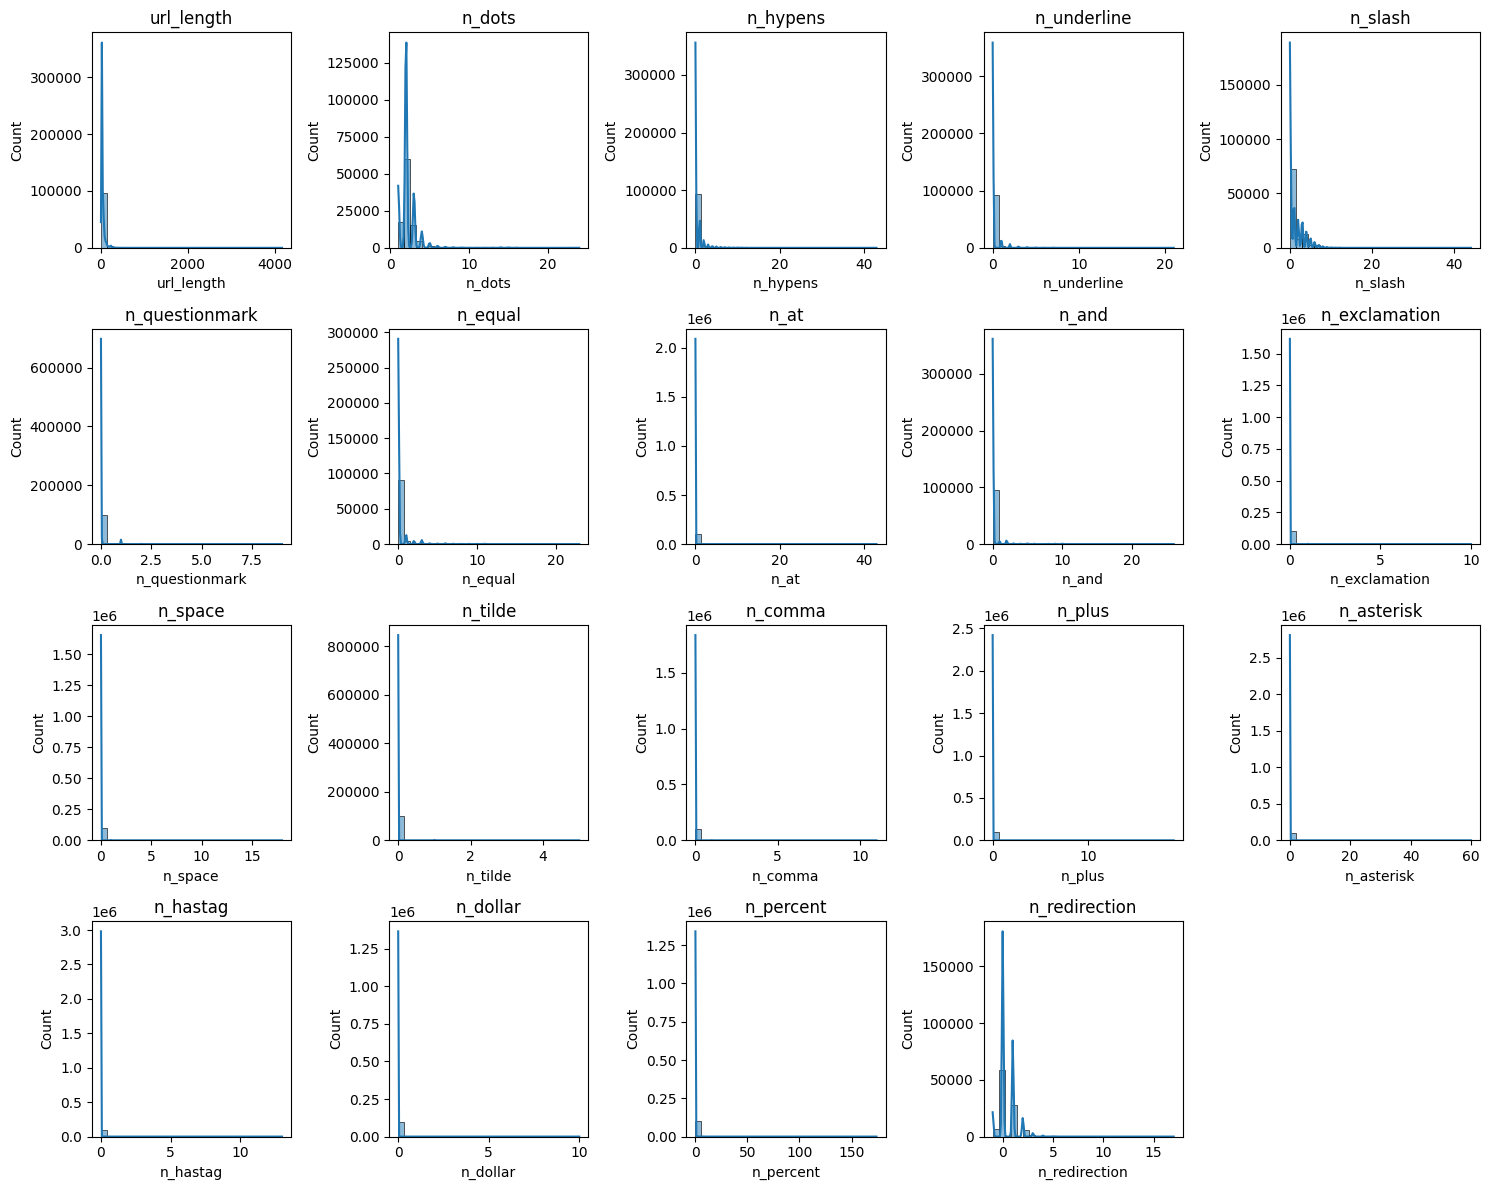

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load dataset
df = pd.read_csv("/content/web-page-phishing.csv")  # Change filename accordingly

# Check class distribution (phishing vs. non-phishing)
print("Class Distribution:")
print(df["phishing"].value_counts())

# Visualizing class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["phishing"], palette="coolwarm")
plt.title("Phishing vs. Non-Phishing Class Distribution")
plt.xlabel("Class (0 = Safe, 1 = Phishing)")
plt.ylabel("Count")
plt.show()

# Check the imbalance ratio
num_phishing = df[df["phishing"] == 1].shape[0]
num_non_phishing = df[df["phishing"] == 0].shape[0]
imbalance_ratio = num_non_phishing / num_phishing if num_phishing > 0 else float('inf')

print(f"Imbalance Ratio: {imbalance_ratio:.2f} (Non-Phishing to Phishing)")

# Feature distribution plots
num_features = len(df.columns) - 1  # Exclude target column
num_rows = math.ceil(num_features / 5)  # Dynamically determine rows

fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(15, num_rows * 3))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):  # Exclude target column
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
!pip install sdv tensorflow pandas numpy scikit-learn matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/

# **Generating Synthetic Data**

In [ ]:
# Install SDV if not already installed
!pip install sdv

import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer

# Step 1: Load the dataset
df = pd.read_csv("/content/web-page-phishing.csv")

# Step 2: Generate metadata automatically
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

# Step 3: Train CTGAN model with the correct metadata
model = CTGANSynthesizer(metadata)
model.fit(df)

# Step 4: Generate synthetic data (same number of rows as original)
synthetic_data = model.sample(len(df))

# Save synthetic data to CSV
synthetic_data.to_csv("synthetic_phishing_data.csv", index=False)

print("✅ Synthetic data generated and saved as 'synthetic_phishing_data.csv'")


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


# **Synthetic Data Visualization**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load dataset
df = pd.read_csv("/content/synthetic_phishing_data.csv")  # Change filename accordingly

# Check class distribution (phishing vs. non-phishing)
print("Class Distribution:")
print(df["phishing"].value_counts())

# Visualizing class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["phishing"], palette="coolwarm")
plt.title("Phishing vs. Non-Phishing Class Distribution")
plt.xlabel("Class (0 = Safe, 1 = Phishing)")
plt.ylabel("Count")
plt.show()

# Check the imbalance ratio
num_phishing = df[df["phishing"] == 1].shape[0]
num_non_phishing = df[df["phishing"] == 0].shape[0]
imbalance_ratio = num_non_phishing / num_phishing if num_phishing > 0 else float('inf')

print(f"Imbalance Ratio: {imbalance_ratio:.2f} (Non-Phishing to Phishing)")

# Feature distribution plots
num_features = len(df.columns) - 1  # Exclude target column
num_rows = math.ceil(num_features / 5)  # Dynamically determine rows

fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(15, num_rows * 3))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):  # Exclude target column
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# **Data Analysis**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read data
data = pd.read_csv('/content/web-page-phishing.csv')

Loading the data using pd.read_csv which reads the data of a CSV file, loads and returns the content in a data frame.

In [ ]:
#top 10 rows
data.head(10)

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,32,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
6,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
8,42,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,104,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


To view the first 19 rows of the dataframe ,we used data.head(10).

In [ ]:
#coulmns of dataset
data.columns

To view all column name of the dataframe,we used data.column() pandas build in function.

In [ ]:
data.shape

(100077, 20)

Get the shape of data i.e. number of rows and columns by using data.shape().

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

Get the number of data points and variables of the dataset, also displays the data types by using data.info().

In [ ]:
data.isna().sum()

,0
url_length,0
n_dots,0
n_hypens,0
n_underline,0
n_slash,0
n_questionmark,0
n_equal,0
n_at,0
n_and,0
n_exclamation,0


data.isna() returns a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings '' or numpy.info are not considered NA values
and here we used sum() with to count the number of null values in each column.

In [ ]:
#statistical information
data.describe()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
count,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000
mean,39.177683,2.224397,0.405188,0.137724,1.135386,0.024391,0.215834,0.022143,0.143330,0.002608,0.004876,0.003617,0.002378,0.002468,0.004097,0.000450,0.001899,0.109286,0.361532,0.363340
std,47.971847,1.255046,1.285465,0.723995,1.828526,0.167789,0.959802,0.268393,0.913656,0.082207,0.144569,0.078500,0.079558,0.104382,0.284046,0.058028,0.097412,1.695327,0.775492,0.480964
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4165.000000,24.000000,43.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,18.000000,5.000000,11.000000,19.000000,60.000000,13.000000,10.000000,174.000000,17.000000,1.000000


For statistical description of the data in the DataFrame, we have used data.describe() a panda's build in function.

In [ ]:
#Count of Phishing and Non-Phishing Web Pages
data['phishing'].map({0: "non-phishing", 1: "phishing"}).value_counts()

,count
phishing,
non-phishing,63715
phishing,36362


The map function replaces values in the phishing column: 0 becomes "non-phishing" and 1 becomes "phishing". The value_counts() function then counts the occurrences of each category.

# **Data Visualization**

**Graph Visualization for each coloumn**

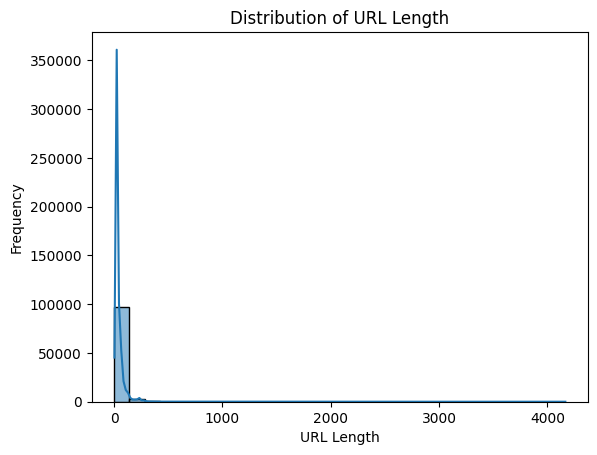

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/web-page-phishing.csv')
sns.histplot(df['url_length'], kde=True, bins=30)
plt.title('Distribution of URL Length')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.show()


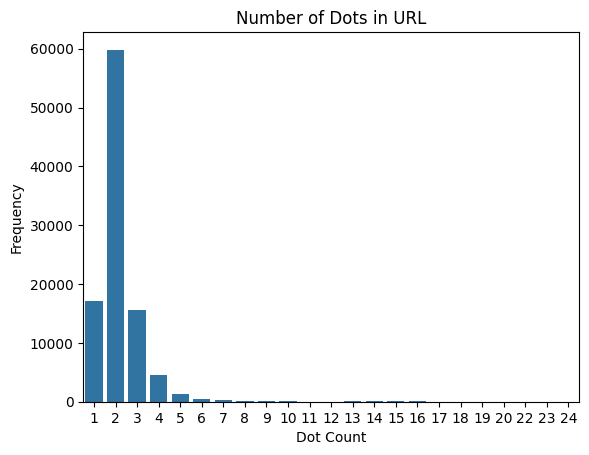

In [ ]:
sns.countplot(x=df['n_dots'])
plt.title('Number of Dots in URL')
plt.xlabel('Dot Count')
plt.ylabel('Frequency')
plt.show()


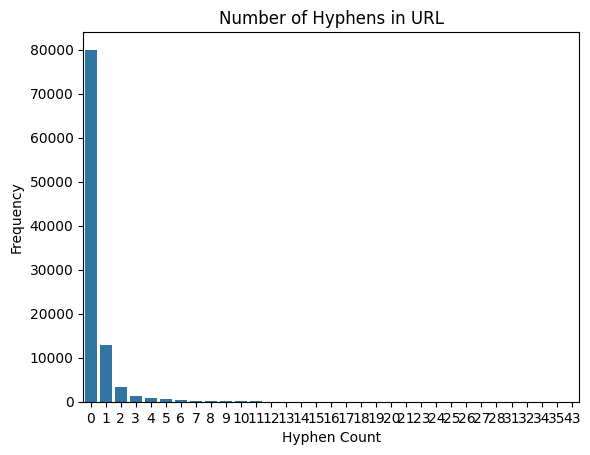

In [ ]:
sns.countplot(x=df['n_hypens'])
plt.title('Number of Hyphens in URL')
plt.xlabel('Hyphen Count')
plt.ylabel('Frequency')
plt.show()


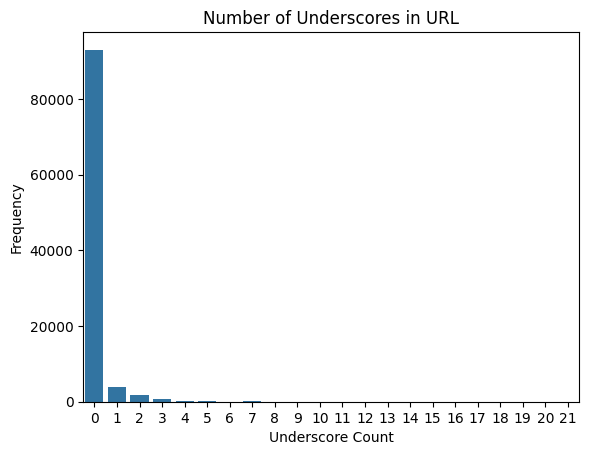

In [ ]:
sns.countplot(x=df['n_underline'])
plt.title('Number of Underscores in URL')
plt.xlabel('Underscore Count')
plt.ylabel('Frequency')
plt.show()


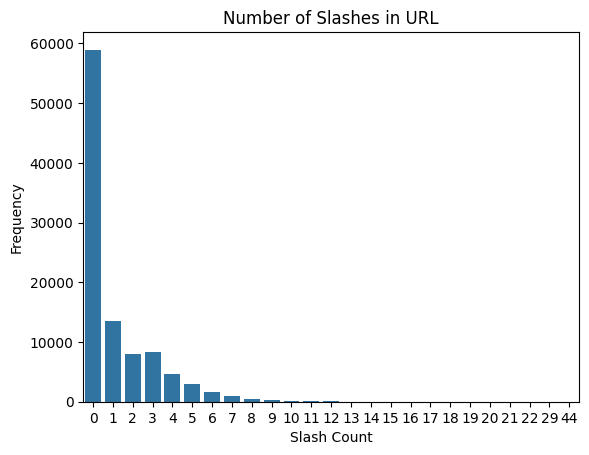

In [ ]:
sns.countplot(x=df['n_slash'])
plt.title('Number of Slashes in URL')
plt.xlabel('Slash Count')
plt.ylabel('Frequency')
plt.show()


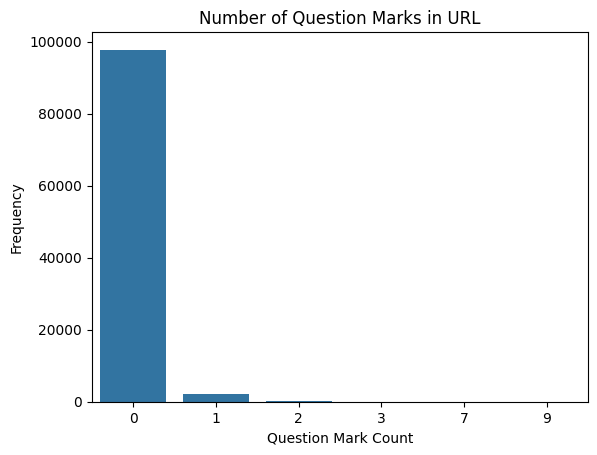

In [ ]:
sns.countplot(x=df['n_questionmark'])
plt.title('Number of Question Marks in URL')
plt.xlabel('Question Mark Count')
plt.ylabel('Frequency')
plt.show()


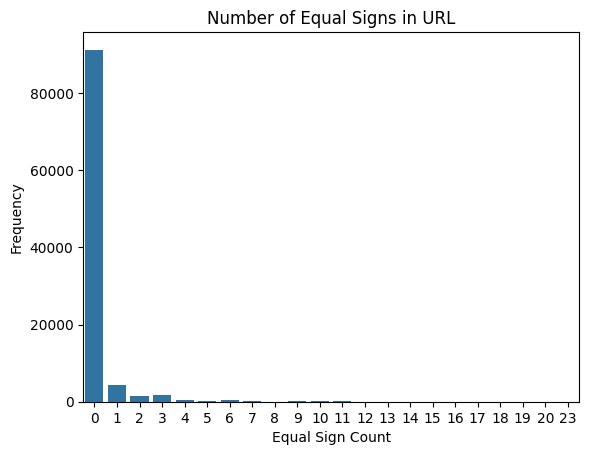

In [ ]:
sns.countplot(x=df['n_equal'])
plt.title('Number of Equal Signs in URL')
plt.xlabel('Equal Sign Count')
plt.ylabel('Frequency')
plt.show()


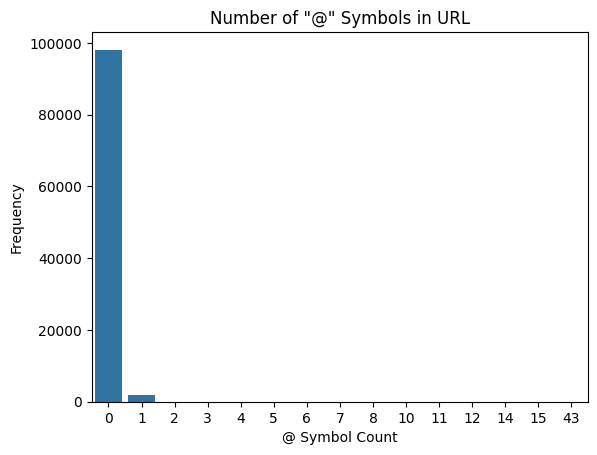

In [ ]:
sns.countplot(x=df['n_at'])
plt.title('Number of "@" Symbols in URL')
plt.xlabel('@ Symbol Count')
plt.ylabel('Frequency')
plt.show()


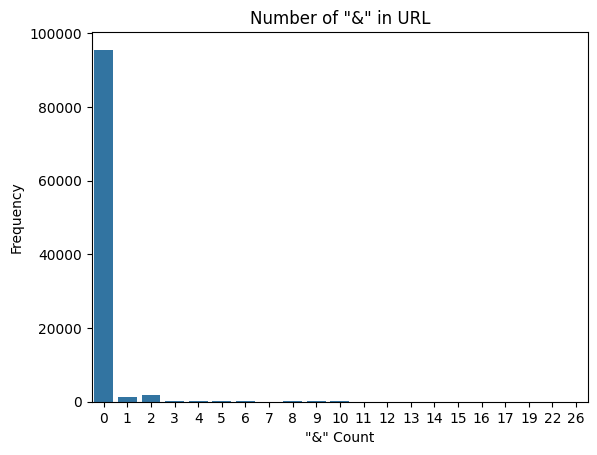

In [ ]:
sns.countplot(x=df['n_and'])
plt.title('Number of "&" in URL')
plt.xlabel('"&" Count')
plt.ylabel('Frequency')
plt.show()


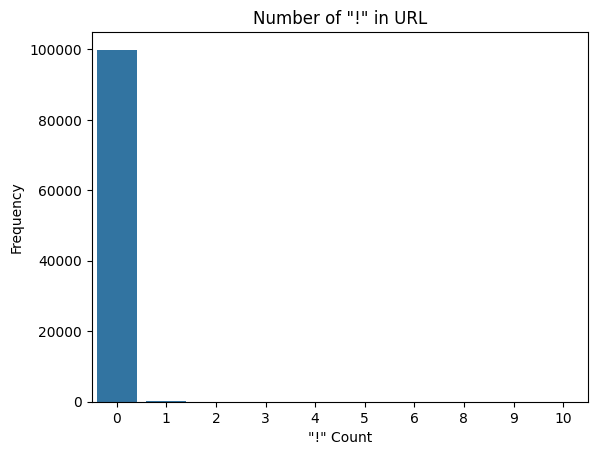

In [ ]:
sns.countplot(x=df['n_exclamation'])
plt.title('Number of "!" in URL')
plt.xlabel('"!" Count')
plt.ylabel('Frequency')
plt.show()


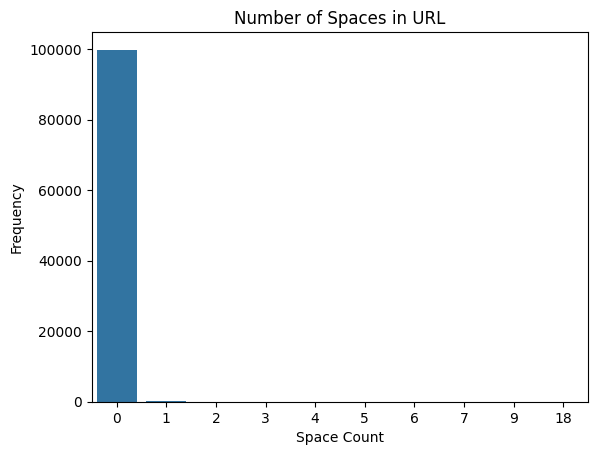

In [ ]:
sns.countplot(x=df['n_space'])
plt.title('Number of Spaces in URL')
plt.xlabel('Space Count')
plt.ylabel('Frequency')
plt.show()


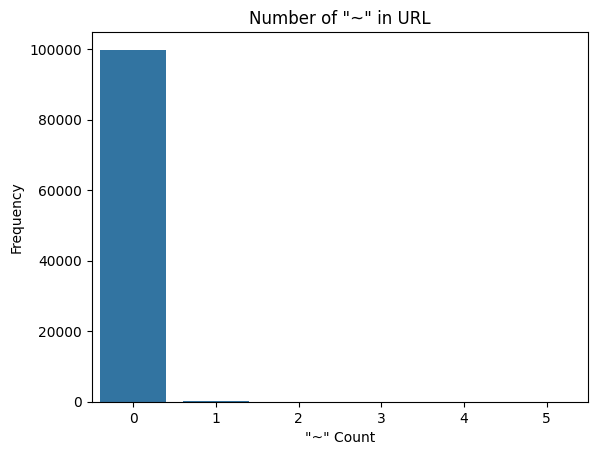

In [ ]:
sns.countplot(x=df['n_tilde'])
plt.title('Number of "~" in URL')
plt.xlabel('"~" Count')
plt.ylabel('Frequency')
plt.show()


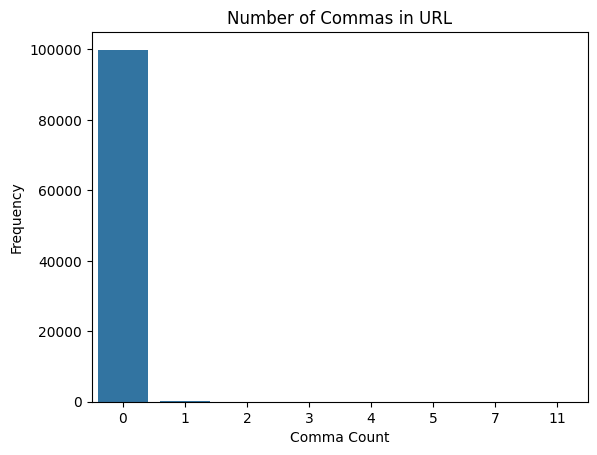

In [ ]:
sns.countplot(x=df['n_comma'])
plt.title('Number of Commas in URL')
plt.xlabel('Comma Count')
plt.ylabel('Frequency')
plt.show()


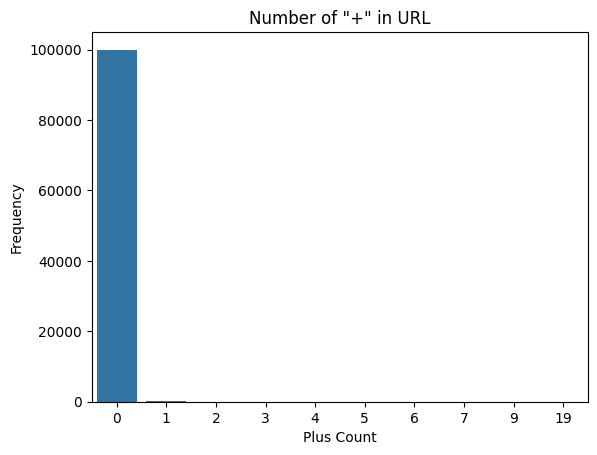

In [ ]:
sns.countplot(x=df['n_plus'])
plt.title('Number of "+" in URL')
plt.xlabel('Plus Count')
plt.ylabel('Frequency')
plt.show()


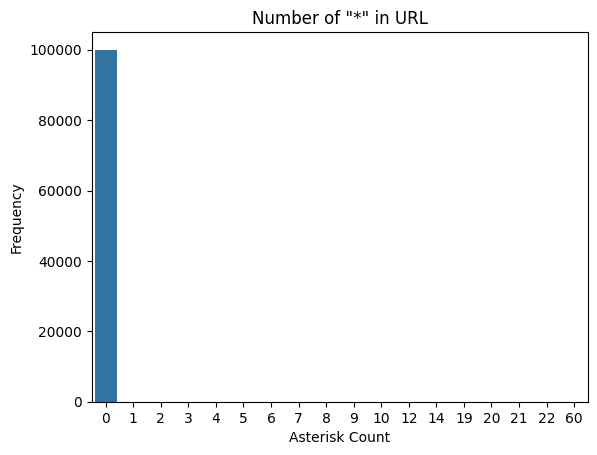

In [ ]:
sns.countplot(x=df['n_asterisk'])
plt.title('Number of "*" in URL')
plt.xlabel('Asterisk Count')
plt.ylabel('Frequency')
plt.show()


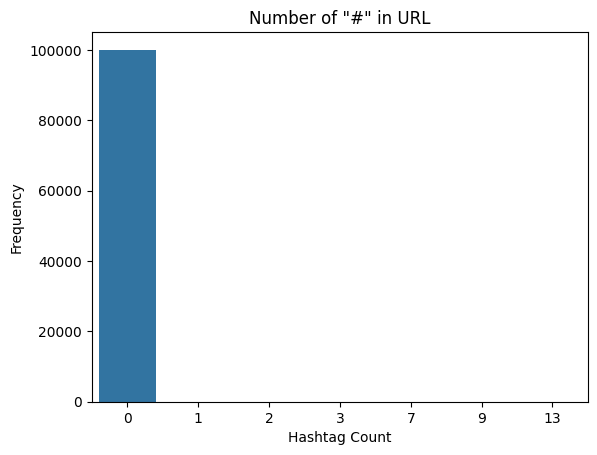

In [ ]:
sns.countplot(x=df['n_hastag'])
plt.title('Number of "#" in URL')
plt.xlabel('Hashtag Count')
plt.ylabel('Frequency')
plt.show()


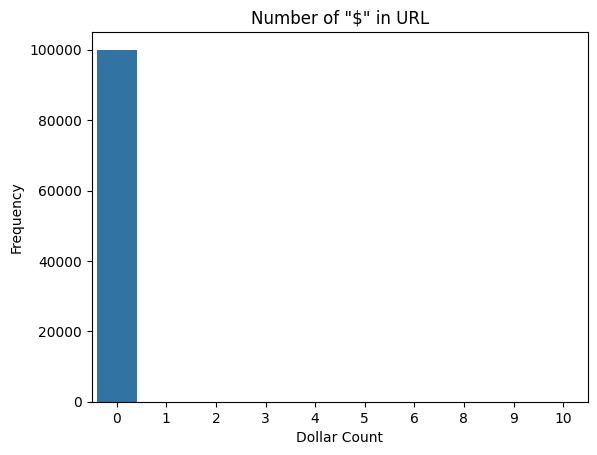

In [ ]:
sns.countplot(x=df['n_dollar'])
plt.title('Number of "$" in URL')
plt.xlabel('Dollar Count')
plt.ylabel('Frequency')
plt.show()


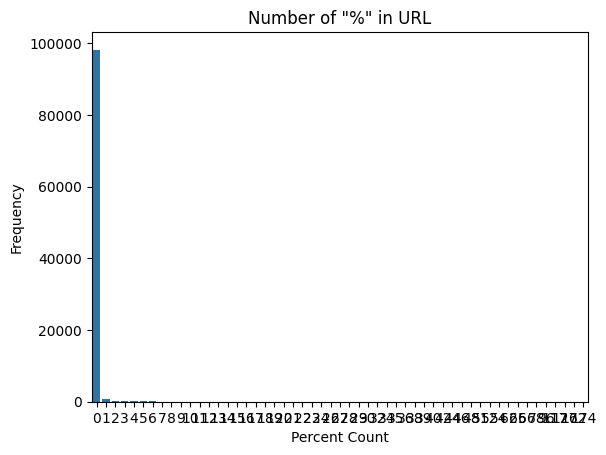

In [ ]:
sns.countplot(x=df['n_percent'])
plt.title('Number of "%" in URL')
plt.xlabel('Percent Count')
plt.ylabel('Frequency')
plt.show()


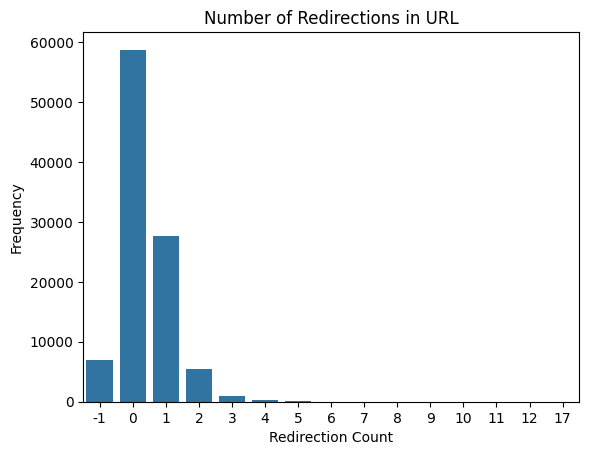

In [ ]:
sns.countplot(x=df['n_redirection'])
plt.title('Number of Redirections in URL')
plt.xlabel('Redirection Count')
plt.ylabel('Frequency')
plt.show()


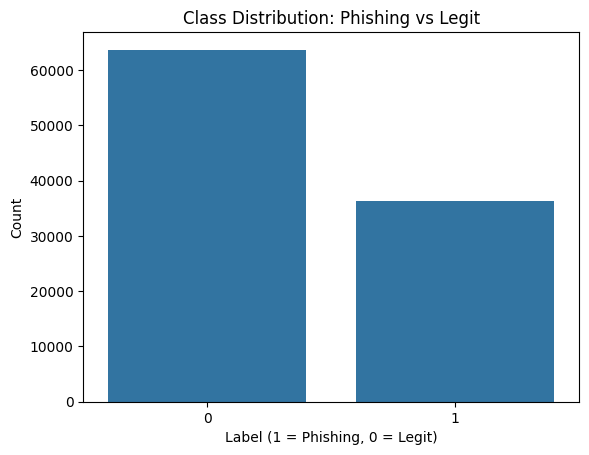

In [ ]:
sns.countplot(x=df['phishing'])
plt.title('Class Distribution: Phishing vs Legit')
plt.xlabel('Label (1 = Phishing, 0 = Legit)')
plt.ylabel('Count')
plt.show()


**Comparative data visualization**

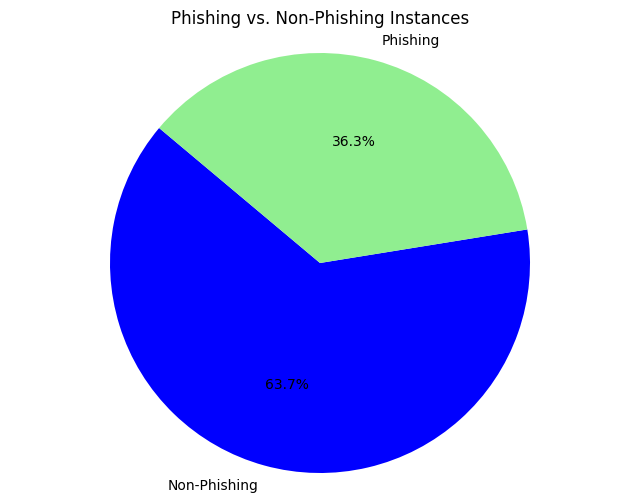

In [ ]:
phishing_counts = data['phishing'].value_counts()

# Define colors for the pie chart segments
colors = ['blue', 'lightgreen']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(phishing_counts, labels=['Non-Phishing', 'Phishing'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Phishing vs. Non-Phishing Instances')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The code above creates a pie chart to visualize the distribution of phishing and non-phishing instances in the dataset. It counts the occurrences of each category, assigns colors, and displays the percentage of each type. The result is a circular pie chart showing that the proportion of phishing are 44.3% and non-phishing web pages are 55.7% in overall dataframe.

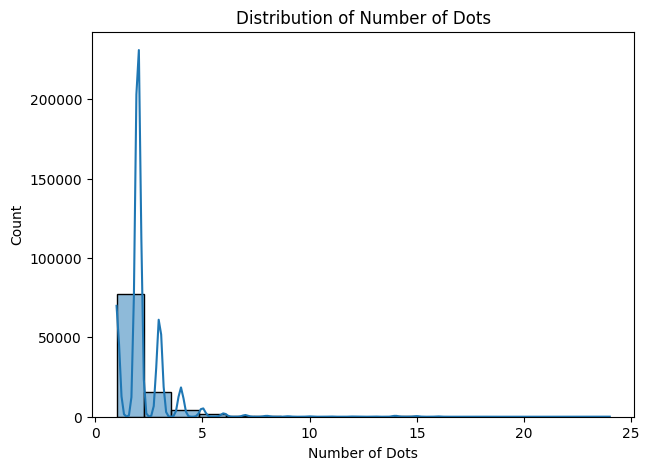

In [ ]:
#Distribution of Number of Dots in Web Page URLs
plt.figure(figsize=(7, 5))
sns.histplot(data['n_dots'], kde=True)
plt.title("Distribution of Number of Dots")
plt.xlabel("Number of Dots")
plt.ylabel("Count")
plt.show()

The above code creates a histogram using Seaborn's histplot() to analyze the distribution of the number of dots (n_dots) in web page URLs. The kde=True parameter overlays a smooth density curve, helping visualize the data distribution. The outcome is a graph showing how frequently different numbers of dots appear in URLs, which can help detect phishing patterns.
This analysis helps detect phishing patterns by showing how URLs with more dots might be suspicious. Since most legitimate URLs have 2-3 dots, a higher number of dots could indicate a phishing attempt.

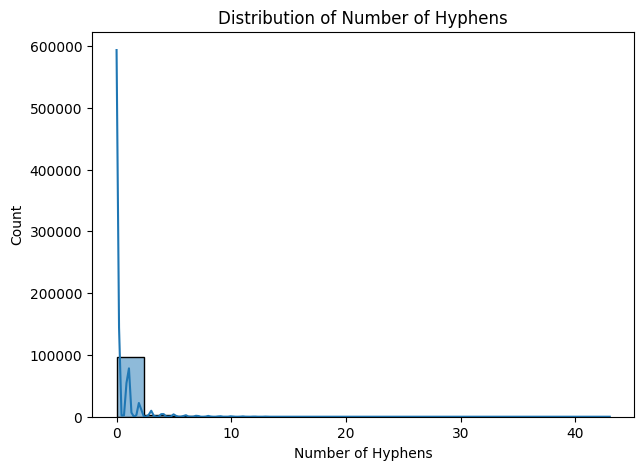

In [ ]:
# Histogram: Distribution of Number of Hyphens
plt.figure(figsize=(7, 5))
sns.histplot(data['n_hypens'], kde=True)
plt.title("Distribution of Number of Hyphens")
plt.xlabel("Number of Hyphens")
plt.ylabel("Count")
plt.show()

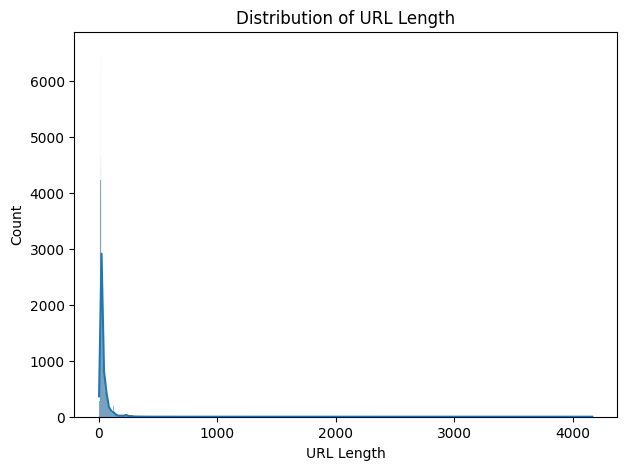

In [ ]:
#Distribution of URL Length in Web Page URLs
plt.figure(figsize=(7, 5))
sns.histplot(data['url_length'], kde=True)
plt.title("Distribution of URL Length")
plt.xlabel("URL Length")
plt.ylabel("Count")
plt.show()

 The histplot() function is used to create a histogram of URL lengths, showing how frequently different lengths appear. The kde=True option adds a smooth density curve for better visualization.
 Phishing URLs are often longer due to added subdomains or random strings. This analysis helps identify suspiciously long URLs, which may indicate phishing attempts.

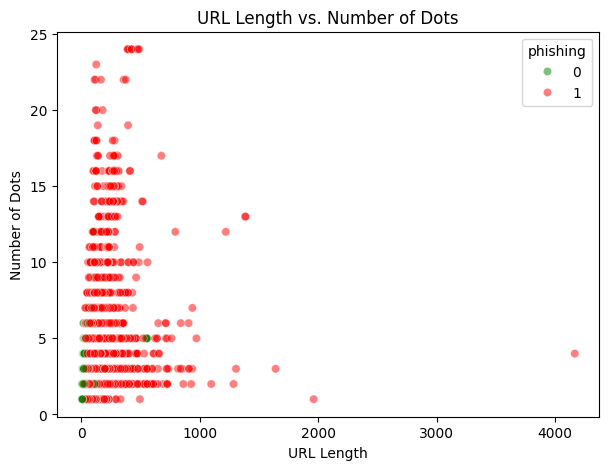

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data['url_length'], y=data['n_dots'], hue=data['phishing'], alpha=0.5, palette=['green', 'red'])
plt.title("URL Length vs. Number of Dots")
plt.xlabel("URL Length")
plt.ylabel("Number of Dots")
plt.show()

Scatter plot using Seaborn create this graph, where URL length is plotted against the number of dots in the URL, with phishing and non-phishing URLs distinguished by color (green for non-phishing and red for phishing). The graph shows that phishing URLs (red) tend to have a higher number of dots and can have longer lengths, whereas non-phishing URLs (green) are shorter and have fewer dots.

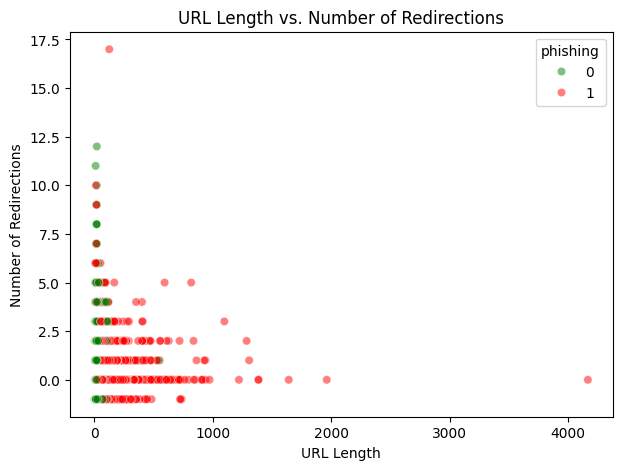

In [ ]:
# Scatter Plot: URL Length vs. Number of Redirections
plt.figure(figsize=(7, 5))
sns.scatterplot(x='url_length', y='n_redirection', hue='phishing', data=data, alpha=0.5, palette=['green', 'red'])
plt.title("URL Length vs. Number of Redirections")
plt.xlabel("URL Length")
plt.ylabel("Number of Redirections")
plt.show()

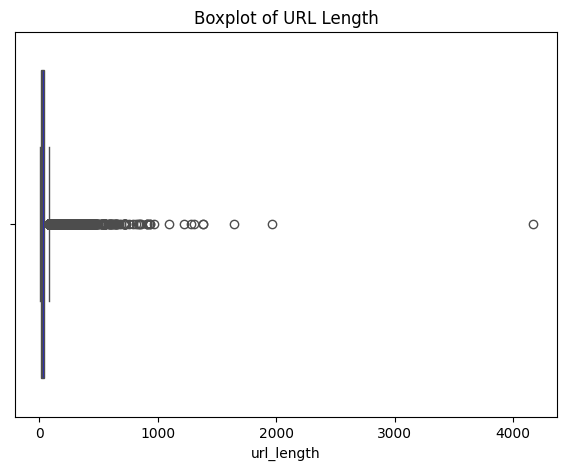

In [ ]:
# Box Plot: URL Length
plt.figure(figsize=(7, 5))
sns.boxplot(x=data['url_length'], color='blue')
plt.title("Boxplot of URL Length")
plt.show()

Box plot visualizes the distribution of URL lengths, where the box represents the interquartile range (IQR), the line inside it is the median, and the dots outside are outliers. The result shows that most URLs have shorter lengths, but there are many extreme outliers, indicating some very long URLs that may be phishing attempts.

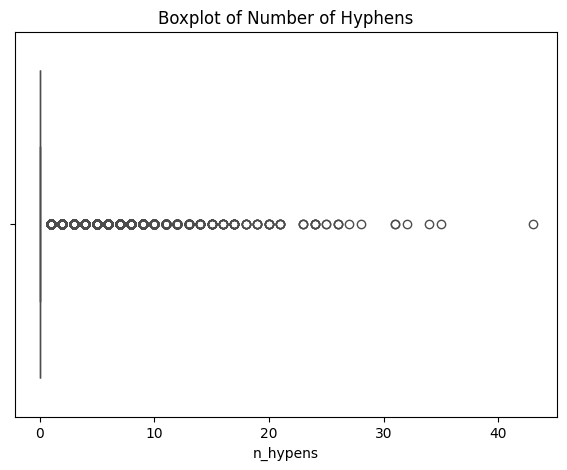

In [ ]:
# Box Plot: Number of Hyphens
plt.figure(figsize=(7, 5))
sns.boxplot(x=data['n_hypens'], color='orange')
plt.title("Boxplot of Number of Hyphens")
plt.xlabel("n_hypens")
plt.show()

Box plot represents the distribution of the number of hypens in URLs, where the box shows the interquartile range (IQR), the central line indicates the median, and dots represent outliers. The result suggests that most URLs have a small number of hypens, but there are many outliers with significantly higher dot counts, which could indicate potential phishing attempts.

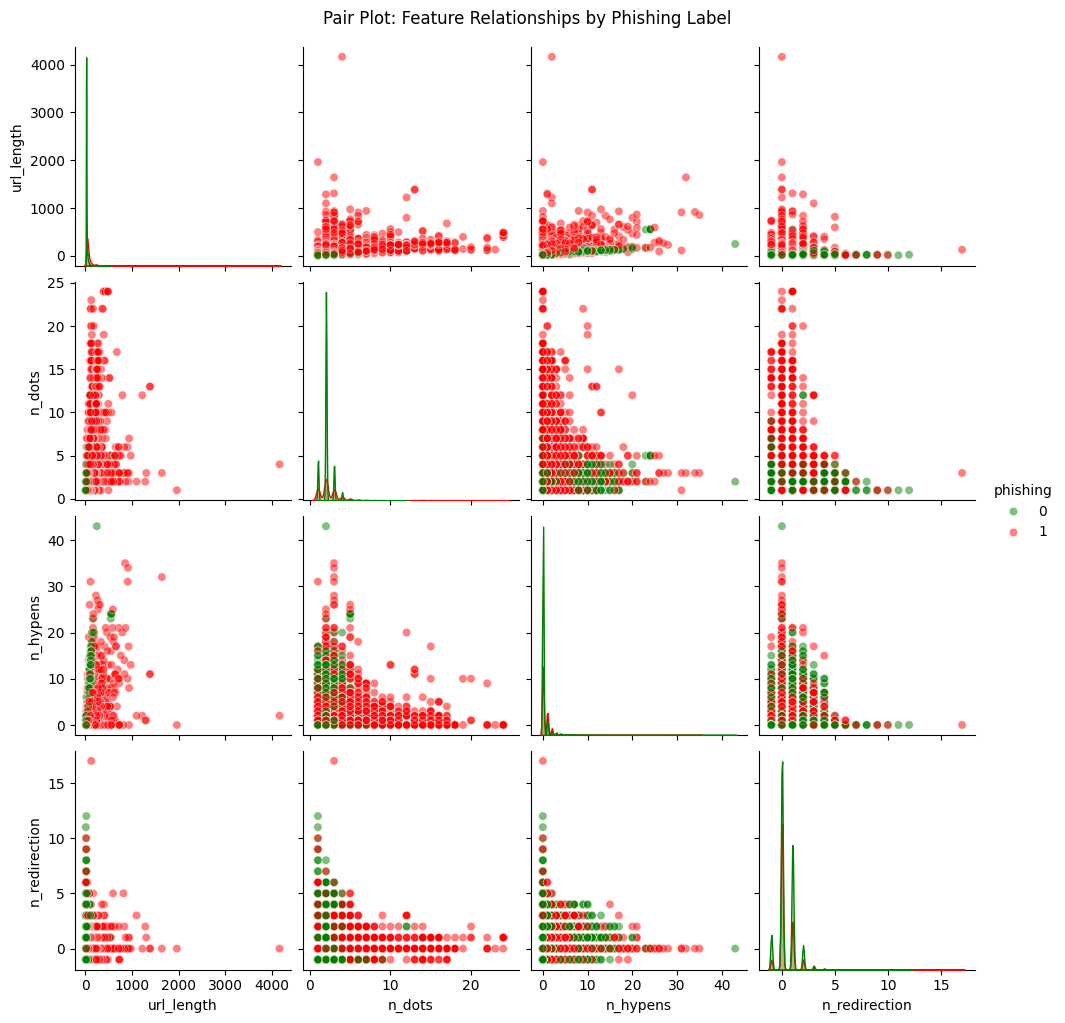

In [ ]:
# Select relevant features and target
features = ['url_length', 'n_dots', 'n_hypens', 'n_redirection', 'phishing']
subset = data[features]

# Pairplot with hue = 'phishing'
sns.pairplot(subset, hue='phishing', palette=['green', 'red'], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot: Feature Relationships by Phishing Label", y=1.02)
plt.show()


# **Data Preprocessing**

**Handle Missing Values**

In [ ]:
# 1. Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# 2. Total missing values
total_missing = data.isnull().sum().sum()
print("\nTotal missing values:", total_missing)


Missing values per column:
 url_length        0
n_dots            0
n_hypens          0
n_underline       0
n_slash           0
n_questionmark    0
n_equal           0
n_at              0
n_and             0
n_exclamation     0
n_space           0
n_tilde           0
n_comma           0
n_plus            0
n_asterisk        0
n_hastag          0
n_dollar          0
n_percent         0
n_redirection     0
phishing          0
dtype: int64

Total missing values: 0


**Remove Duplicates**

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/web-page-phishing.csv')  # Replace with the actual path to your file

# Identify duplicate rows (keeping the first occurrence)
duplicates = data[data.duplicated(keep=False)]  # `keep=False` keeps all occurrences of the duplicate rows

# Group duplicate rows by their exact values
grouped_duplicates = duplicates.groupby(list(data.columns)).apply(lambda x: x.index.tolist())

# Print the pairs of duplicate rows along with their indices
print("Pairs of duplicate rows (with indices):")
for group, indices in grouped_duplicates.items():
    print(f"Duplicate rows: {group}")
    print(f"Indices: {indices}")
    print("-" * 40)


Pairs of duplicate rows (with indices):
Duplicate rows: (5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0)
Indices: [22142, 30035, 90751, 95686, 98216]
----------------------------------------
Duplicate rows: (5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Indices: [17124, 23801, 28126, 48865, 76825, 83826, 86522]
----------------------------------------
Duplicate rows: (5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)
Indices: [20988, 42866]
----------------------------------------
Duplicate rows: (5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0)
Indices: [32329, 78564, 80179, 95564]
----------------------------------------
Duplicate rows: (6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0)
Indices: [16171, 24246, 25032, 66214, 67959]
----------------------------------------
Duplicate rows: (6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Indices: [22338, 22928, 23431, 23767, 29668, 30142, 35871, 36921, 36944, 43366, 

<ipython-input-6-354746ed2f73>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_duplicates = duplicates.groupby(list(data.columns)).apply(lambda x: x.index.tolist())


In [ ]:
# Remove duplicates in-place, keeping the first occurrence
data.drop_duplicates(keep='first', inplace=True)

# Verify removal
duplicates_after_removal = data.duplicated().sum()
print(f"Total duplicate rows after removal: {duplicates_after_removal}")


Total duplicate rows after removal: 0


**Outliers**

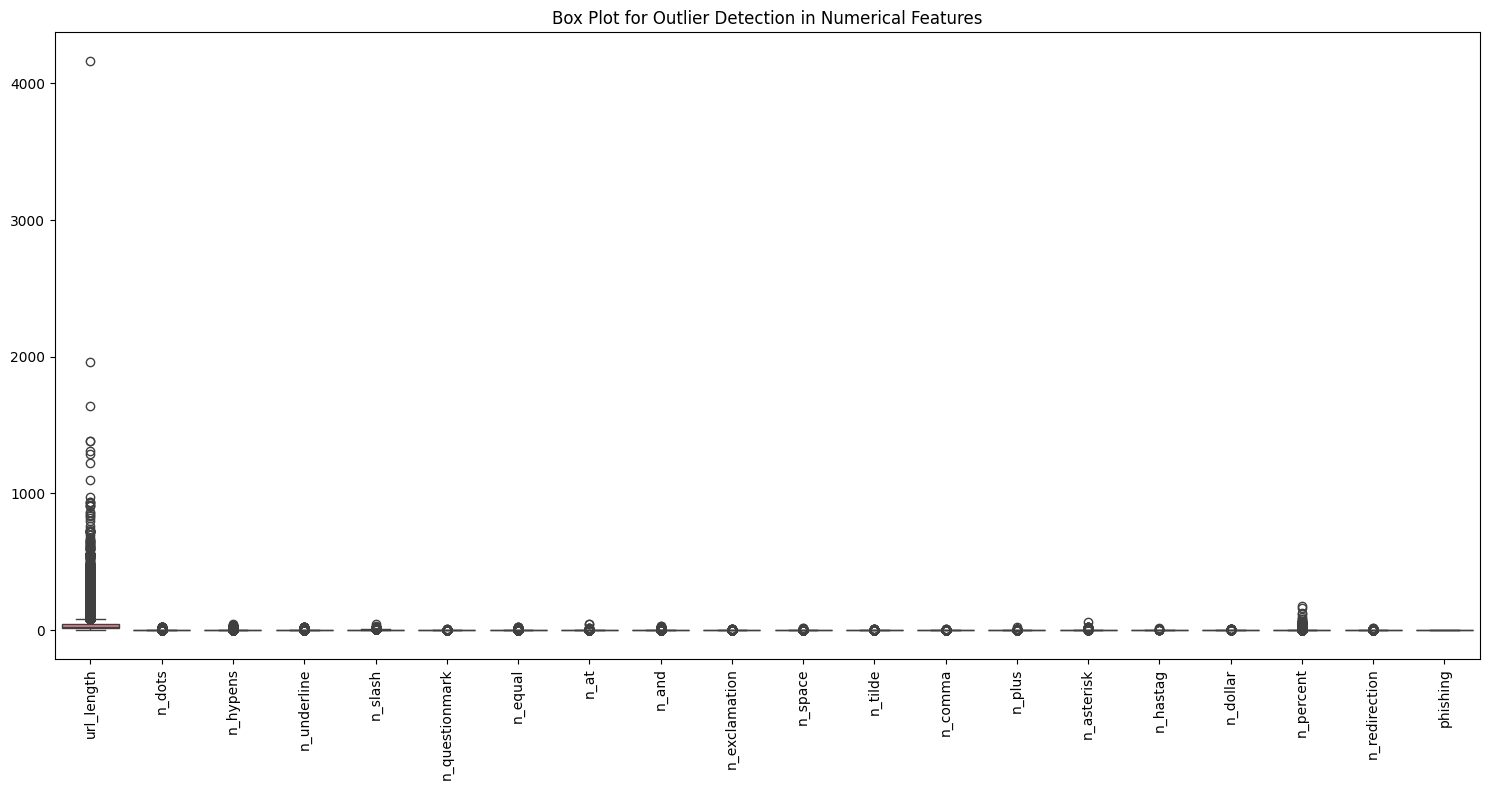

In [ ]:
# Select only numerical columns for outlier detection
numerical_data = data.select_dtypes(include=np.number)

# Set the plot size
plt.figure(figsize=(15, 8))

# Create the box plot
sns.boxplot(data=numerical_data)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Add title
plt.title('Box Plot for Outlier Detection in Numerical Features')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Detecting outliers using the IQR method

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/rd-web-phishing-data.csv')

# Select only numerical columns for outlier detection
numerical_data = data.select_dtypes(include=np.number)
outlier_summary = {}

for column in numerical_data.columns:
    Q1 = numerical_data[column].quantile(0.25)
    Q3 = numerical_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = numerical_data[(numerical_data[column] < lower_bound) | (numerical_data[column] > upper_bound)]

    # Store results
    outlier_summary[column] = {
        "num_outliers": outliers.shape[0],
        "outlier_indices": outliers.index.tolist()
    }

# Print summary of outliers
for col, summary in outlier_summary.items():
    print(f"{col}: {summary['num_outliers']} outliers detected")


url_length: 1858 outliers detected
n_dots: 2359 outliers detected
n_hypens: 1193 outliers detected
n_underline: 4949 outliers detected
n_slash: 152 outliers detected
n_questionmark: 1732 outliers detected
n_equal: 1958 outliers detected
n_at: 1574 outliers detected
n_and: 3075 outliers detected
n_exclamation: 139 outliers detected
n_space: 230 outliers detected
n_tilde: 231 outliers detected
n_comma: 102 outliers detected
n_plus: 99 outliers detected
n_asterisk: 64 outliers detected
n_hastag: 11 outliers detected
n_dollar: 64 outliers detected
n_percent: 1601 outliers detected
n_redirection: 756 outliers detected
phishing: 0 outliers detected


In [ ]:
import pandas as pd
import numpy as np

def cap_outliers_iqr(df):
    df_capped = df.copy()
    for column in df_capped.select_dtypes(include=np.number).columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Cap the outliers
        df_capped[column] = np.where(df_capped[column] < lower, lower,
                                     np.where(df_capped[column] > upper, upper, df_capped[column]))
    return df_capped

# Example usage
data = pd.read_csv("/content/rd-web-phishing-data.csv")
capped_data = cap_outliers_iqr(data)
capped_data.to_csv("capped_data.csv", index=False)


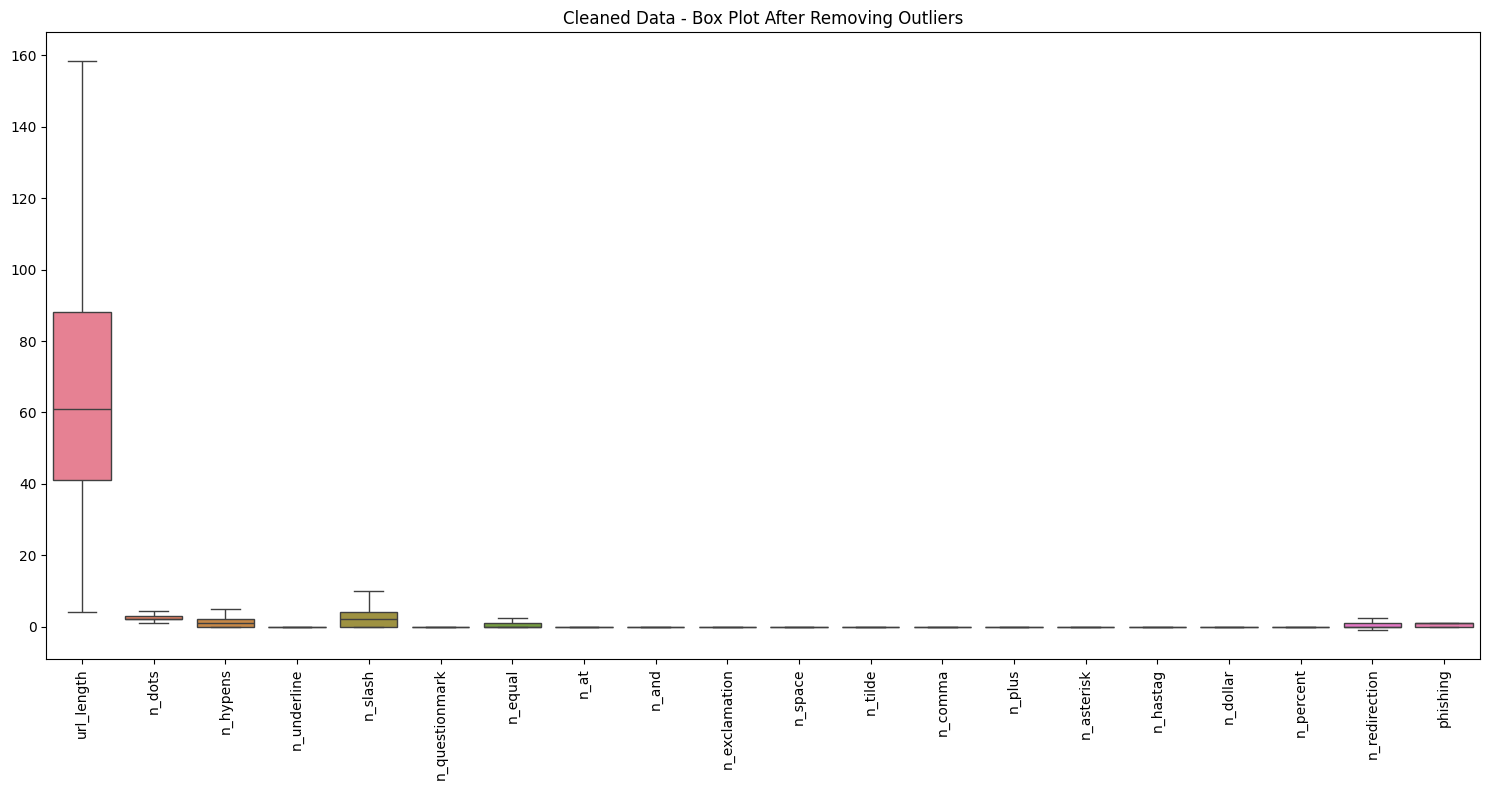

In [ ]:
data=pd.read_csv('/content/capped_data.csv')
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title('Cleaned Data - Box Plot After Removing Outliers')
plt.tight_layout()
plt.show()


In [ ]:
print(f"Data shape after removing outliers: {data.shape}")


Data shape after removing outliers: (21891, 20)


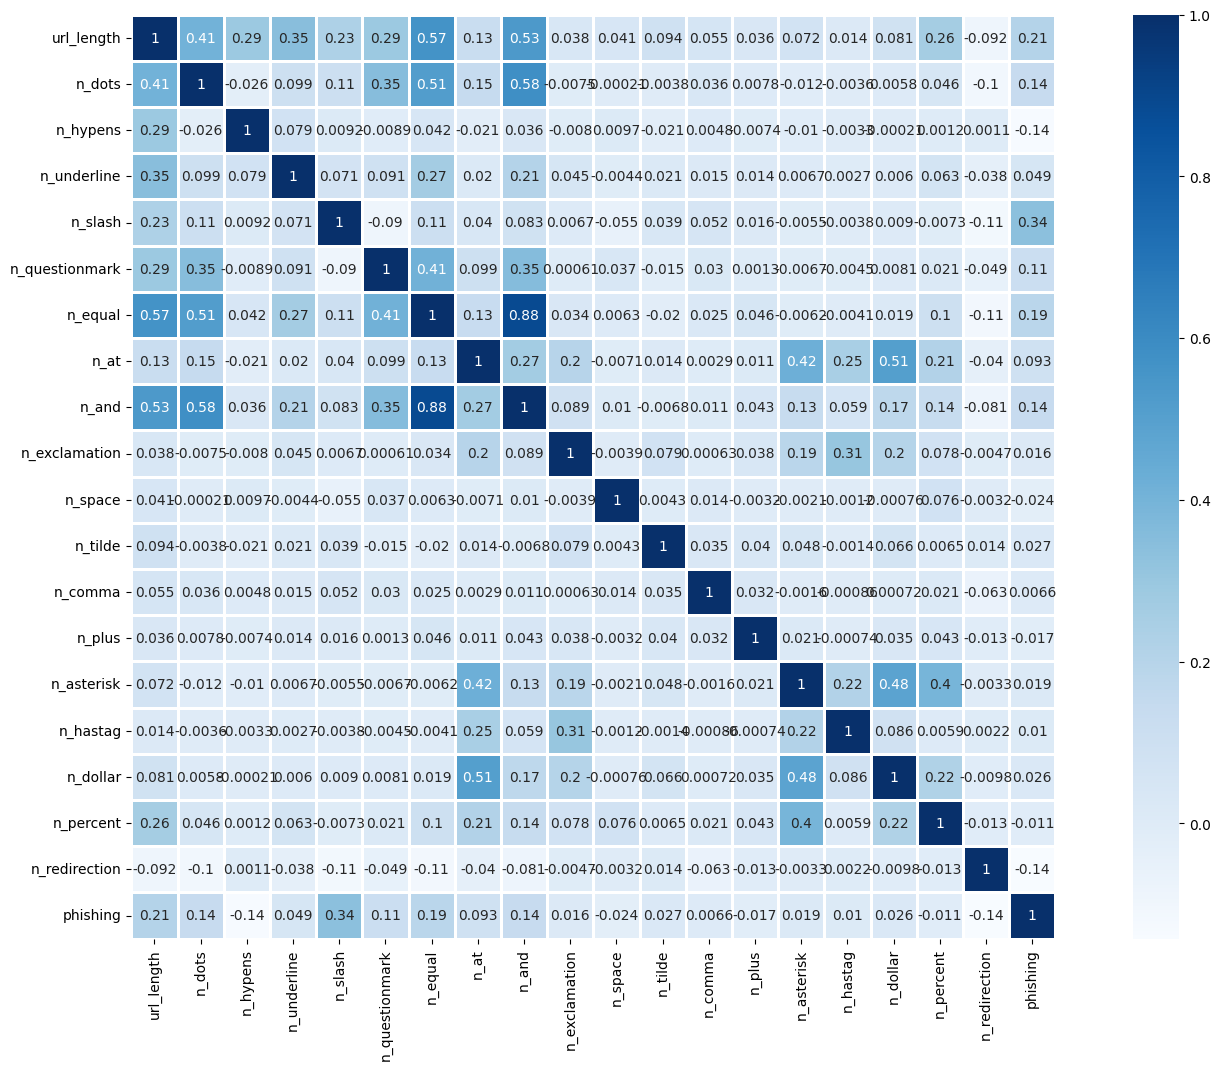

In [ ]:
#Correlation Heatmap of Web Page Features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/rd-web-phishing-data.csv')
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(data.corr(), cmap='Blues', annot=True, linewidth=0.9, ax=ax, square=0.9)
plt.show()

Correlation heatmap visualizes the relationships between various webpage features and phishing likelihood, where darker blue indicates stronger positive correlations and lighter shades (or negative values) indicate weaker or inverse relationships. The result shows that certain features, like the presence of "&" and "slash," have a stronger correlation with phishing, while others, like "equal signs," have a negative correlation.

In [ ]:
# # Calculate the correlation matrix
# corr_matrix = data.corr()

# # Exclude the correlation with 'phishing' column
# top_corr = corr_matrix['phishing'].drop('phishing').sort_values(ascending=False)[:3]

# print("Top 3 correlations except phishing:")
# print(top_corr)

In [ ]:
# #Top Correlation Matrix of Web Page Features
# top_corr_matrix = corr_matrix.loc[top_corr.index, top_corr.index]
# #Top 3 Correlations
# plt.title('top 3 Correlations Except Phishing')

# sns.heatmap(top_corr_matrix, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [ ]:
# # Calculate the correlation matrix
# corr_matrix = data.corr()

# # Exclude the correlation with 'phishing' column
# least_corr = corr_matrix['phishing'].drop('phishing').sort_values()[:3]

# print("Least 3 correlations except phishing:")
# print(least_corr)

In [ ]:
# #Least Correlation Matrix of Web Page Features
# least_corr_matrix = corr_matrix.loc[least_corr.index, least_corr.index]
# #least 3 Correlations
# plt.title('Least 3 Correlations Except Phishing')

# sns.heatmap(least_corr_matrix, cmap='RdBu', vmin=-1, vmax=1, annot=True)